In [10]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.15.0


In [11]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [12]:
train_images.shape
len(train_labels)

60000

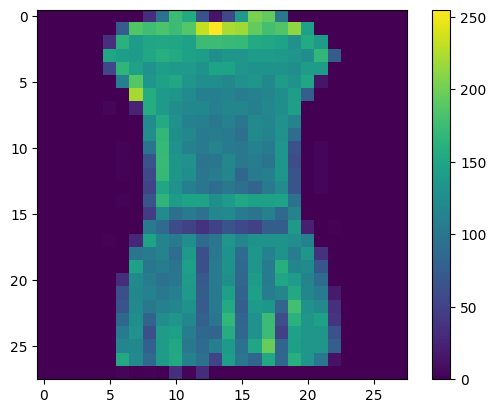

In [13]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)
plt.show()

train_images = train_images / 255.0
test_images = test_images / 255.0

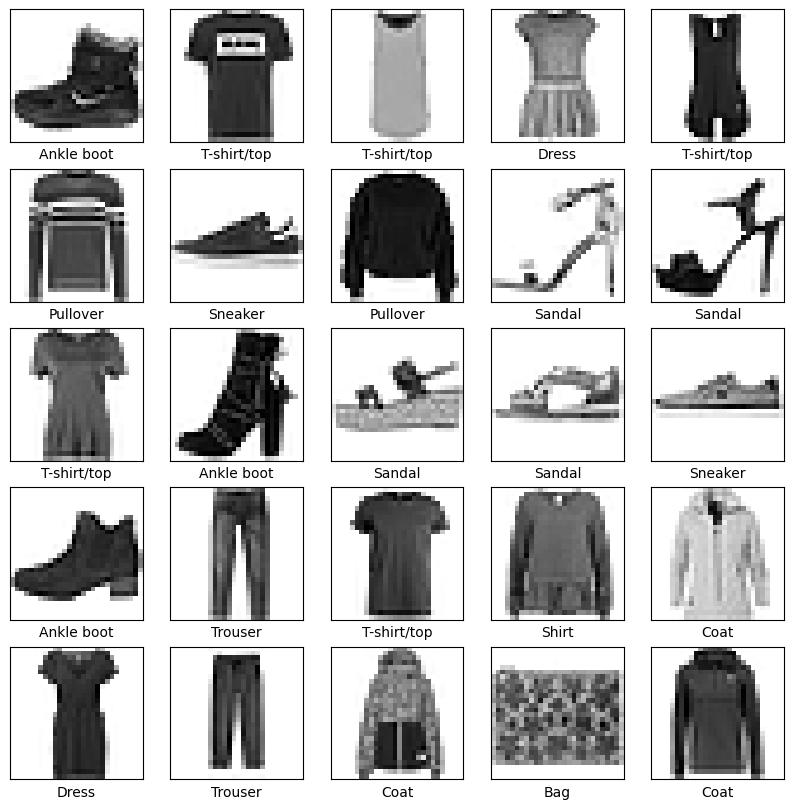

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [19]:
model= tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)

])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5021 - accuracy: 0.8233
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3737 - accuracy: 0.8653
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3351 - accuracy: 0.8785
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3121 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2962 - accuracy: 0.8905
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2812 - accuracy: 0.8960
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2703 - accuracy: 0.8995
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2578 - accuracy: 0.9033
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2489 - accuracy: 0.9071
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3321 - accuracy: 0.8840 - 828ms/epoch - 3ms/step

Test accuracy: 0.8840000033378601


In [21]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

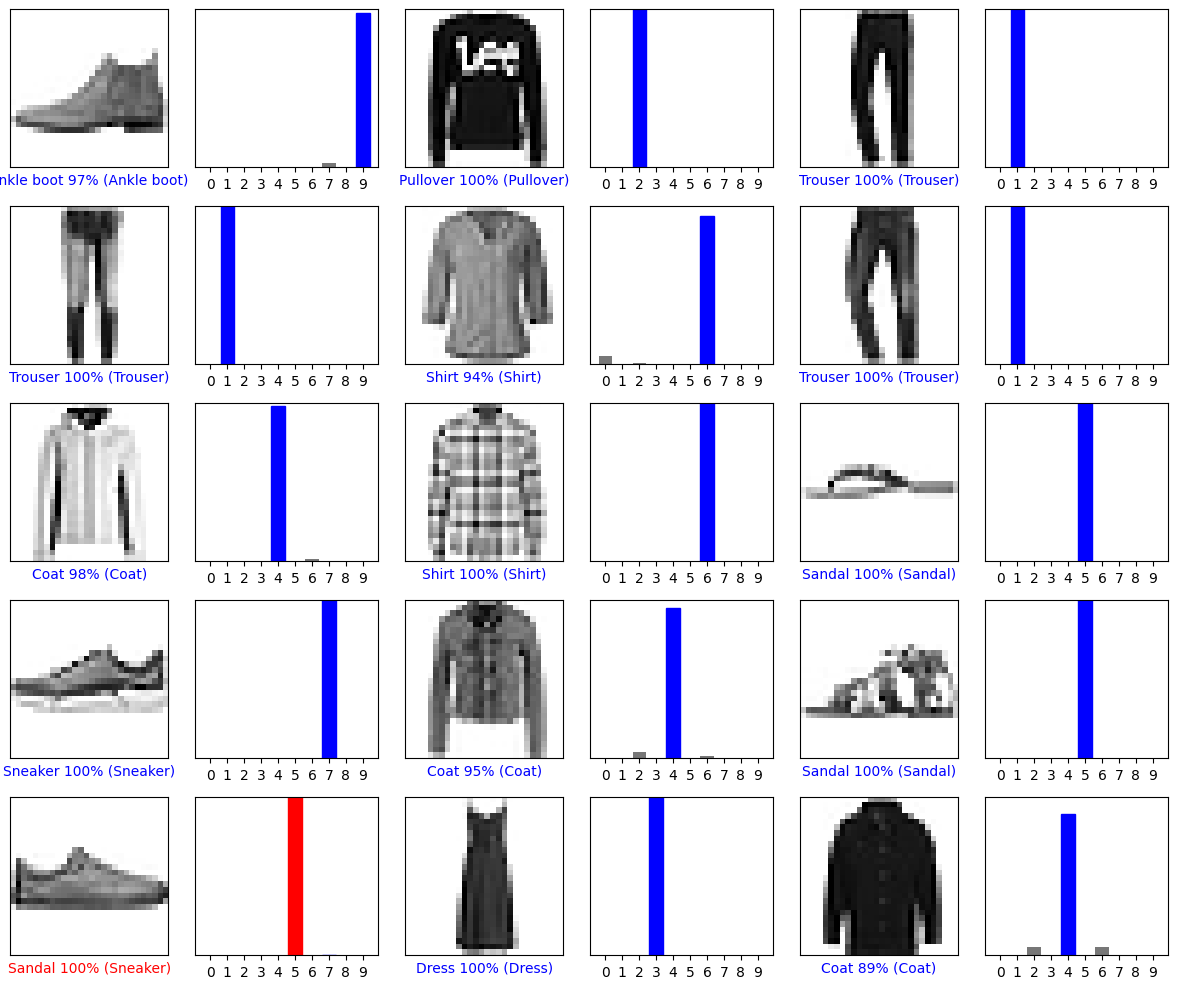

In [25]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [29]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

img=np.expand_dims(img,0)
print(img.shape)
predictions_single = probability_model.predict(img)
print(predictions_single)
np.argmax(predictions_single[0])

(28, 28)
(1, 28, 28)
1/1 [==============================] - 0s 31ms/step
[[4.7658823e-06 1.9486357e-12 9.9847764e-01 4.4085586e-11 1.3038535e-03
  1.6481625e-11 2.1374374e-04 1.1794611e-13 3.4854220e-11 1.2633109e-16]]


2